<a href="https://colab.research.google.com/github/locpham21/finalproject3I/blob/main/BaiTapVeNha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import zipfile


zip_path = "/content/DataF.zip"
extract_to = "/content/flowers"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


data_path = "/content/flowers/DataF"
img_size = (100, 100)

X = []
y = []
classes = sorted(os.listdir(data_path))  # ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print("Lớp:", classes)

# Gán nhãn và load ảnh
for i, label in enumerate(classes):
    folder = os.path.join(data_path, label)
    if not os.path.isdir(folder):
        continue
    for file in os.listdir(folder):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        try:
            img_path = os.path.join(folder, file)
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0
            X.append(img)
            y.append(i)
        except Exception as e:
            print("Lỗi ảnh:", img_path, "->", e)

# Chuyển sang mảng NumPy
X = np.array(X)
y = to_categorical(y)

print(f"Tổng số ảnh: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = models.Sequential()
model.add(layers.Flatten(input_shape=(100, 100, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))  # 5 lớp đầu ra

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Lớp: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Tổng số ảnh: 116
Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 877ms/step - accuracy: 0.1479 - loss: 15.7148 - val_accuracy: 0.2917 - val_loss: 26.0246
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2563 - loss: 22.7070 - val_accuracy: 0.2083 - val_loss: 17.9461
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1977 - loss: 11.7558 - val_accuracy: 0.2917 - val_loss: 5.0366
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4042 - loss: 4.6006 - val_accuracy: 0.3333 - val_loss: 2.7491
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4455 - loss: 1.6441 - val_accuracy: 0.2083 - val_loss: 5.1662
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3675 - loss: 3.1490 - val_accuracy: 0.2083 - val_loss: 2.9339
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5173 - loss: 2.4010 - val_accuracy: 0.2083 - val_loss: 3.2759
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


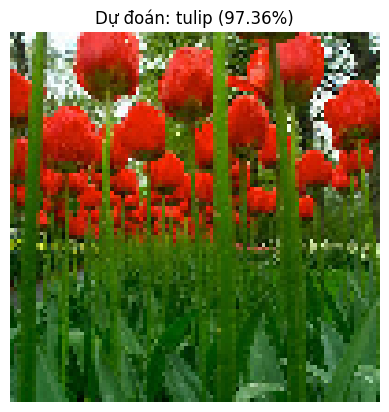

==> Mô hình đoán đây là: tulip với độ tin cậy 97.36%


In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn ảnh đã upload
image_path = "/content/924782410_94ed7913ca_m.jpg"

def predict_image(image_path, model, classes, img_size=(100, 100)):
    # Load và xử lý ảnh
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {classes[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    print(f"==> Mô hình đoán đây là: {classes[predicted_class]} với độ tin cậy {confidence:.2%}")

# Gọi hàm dự đoán
predict_image("/content/924782410_94ed7913ca_m.jpg", model, classes)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import zipfile


zip_path = "/content/Moneyy (2).zip"
extract_to = "/content/Moneyy1"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


data_path =  "/content/Moneyy1/Moneyy"
img_size = (100, 100)

X = []
y = []
classes = sorted(os.listdir(data_path))  # Danh sách các thư mục lớp
print("Lớp:", classes)

# Gán nhãn và load ảnh
for i, label in enumerate(classes):
    folder = os.path.join(data_path, label)
    if not os.path.isdir(folder):
        continue
    for file in os.listdir(folder):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        try:
            img_path = os.path.join(folder, file)
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0
            X.append(img)
            y.append(i)
        except Exception as e:
            print("Lỗi ảnh:", img_path, "->", e)


X = np.array(X)
y = to_categorical(y)
print(f"Tổng số ảnh: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = models.Sequential()
model.add(layers.Flatten(input_shape=(100, 100, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))  # Đầu ra bằng số lớp

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Lớp: ['1000', '10000', '100000', '2000', '20000', '200000', '5000', '50000', '500000']
Tổng số ảnh: 40
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0625 - loss: 2.6307 - val_accuracy: 0.0000e+00 - val_loss: 70.9803
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1250 - loss: 36.6993 - val_accuracy: 0.0000e+00 - val_loss: 73.8587
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.1250 - loss: 40.8275 - val_accuracy: 0.0000e+00 - val_loss: 74.0762
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1562 - loss: 42.6568 - val_accuracy: 0.0000e+00 - val_loss: 80.3020
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.1562 - loss: 58.0182 - val_accuracy: 0.1250 - val_loss: 80.1251
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1250 - loss: 72.3022 - val_accuracy: 0.1250 - val_loss: 88.5003
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0938 - loss: 89.3251 - val_accuracy: 0.1250 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


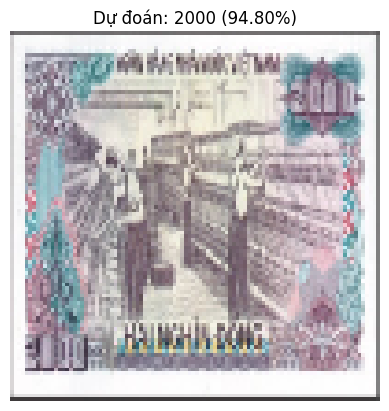

==> Mô hình đoán đây là: 2000 với độ tin cậy 94.80%


In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn ảnh đã upload
image_path = "/content/Giấy_bạc_2000_đồng.jpg"

def predict_image(image_path, model, classes, img_size=(100, 100)):
    # Load và xử lý ảnh
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {classes[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    print(f"==> Mô hình đoán đây là: {classes[predicted_class]} với độ tin cậy {confidence:.2%}")

# Gọi hàm dự đoán
predict_image("/content/Giấy_bạc_2000_đồng.jpg", model, classes)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import zipfile


zip_path = "/content/Food.zip"
extract_to = "/content/Food"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


data_path =  "/content/Food/Food"
img_size = (100, 100)

X = []
y = []
classes = sorted(os.listdir(data_path))
print("Lớp:", classes)

# Gán nhãn và load ảnh
for i, label in enumerate(classes):
    folder = os.path.join(data_path, label)
    if not os.path.isdir(folder):
        continue
    for file in os.listdir(folder):
        if not file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        try:
            img_path = os.path.join(folder, file)
            img = load_img(img_path, target_size=img_size)
            img = img_to_array(img) / 255.0
            X.append(img)
            y.append(i)
        except Exception as e:
            print("Lỗi ảnh:", img_path, "->", e)


X = np.array(X)
y = to_categorical(y)
print(f"Tổng số ảnh: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = models.Sequential()
model.add(layers.Flatten(input_shape=(100, 100, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(len(classes), activation='softmax'))  # Đầu ra bằng số lớp

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Lớp: ['BanhCuon', 'BanhMi', 'BunDauMamTom', 'ComTam', 'MiCay']
Tổng số ảnh: 22
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2941 - loss: 1.7265 - val_accuracy: 0.0000e+00 - val_loss: 39.5503
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2353 - loss: 17.2071 - val_accuracy: 0.2000 - val_loss: 50.8424
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1765 - loss: 34.3782 - val_accuracy: 0.0000e+00 - val_loss: 53.9555
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2941 - loss: 40.3611 - val_accuracy: 0.4000 - val_loss: 28.8138
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.2941 - loss: 29.0810 - val_accuracy: 0.4000 - val_loss: 10.3812
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.4118 - loss: 15.3929 - val_accuracy: 0.4000 - val_loss: 21.8843
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.1176 - loss: 19.1626 - val_accuracy: 0.4000 - val_loss: 17.6238
Epoch 8/100
1/1 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


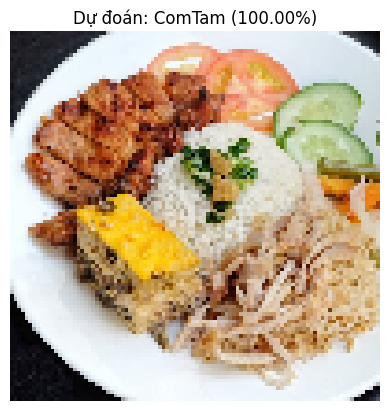

==> Mô hình đoán đây là: ComTam với độ tin cậy 100.00%


In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn ảnh đã upload
image_path = "/content/924782410_94ed7913ca_m.jpg"

def predict_image(image_path, model, classes, img_size=(100, 100)):
    # Load và xử lý ảnh
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {classes[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    print(f"==> Mô hình đoán đây là: {classes[predicted_class]} với độ tin cậy {confidence:.2%}")

# Gọi hàm dự đoán
predict_image("/content/com-tam-sai-gon-2.jpg", model, classes)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import zipfile


zip_path = '/content/BànTay.zip'
extract_to = '/content/BànTay'


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
print("✅ Đã giải nén xong")


subfolders = os.listdir(extract_to)
if len(subfolders) == 1:
    data_path = os.path.join(extract_to, subfolders[0])
else:
    data_path = extract_to

print("📁 Thư mục dữ liệu ảnh:", data_path)


img_size = (100, 100)
X = []
y = []
classes = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])
print("🧑‍🏫 Các lớp nhận diện:", classes)

for i, label in enumerate(classes):
    folder = os.path.join(data_path, label)
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img_path = os.path.join(folder, file)
                img = load_img(img_path, target_size=img_size)
                img = img_to_array(img) / 255.0
                X.append(img)
                y.append(i)
            except Exception as e:
                print("❌ Lỗi ảnh:", img_path, "->", e)


X = np.array(X)
y = to_categorical(y)
print(f"📷 Tổng số ảnh: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = models.Sequential([
    layers.Flatten(input_shape=(100, 100, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

✅ Đã giải nén xong
📁 Thư mục dữ liệu ảnh: /content/BànTay/BànTay
🧑‍🏫 Các lớp nhận diện: ['Tay của Huy', 'Tay của Lộc', 'Tay của Quân', 'Tay của Trung', 'Tay của Trường']
📷 Tổng số ảnh: 48
Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1678 - loss: 5.0256 - val_accuracy: 0.2000 - val_loss: 47.5162
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2484 - loss: 34.8259 - val_accuracy: 0.1000 - val_loss: 17.5524
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2588 - loss: 22.1245 - val_accuracy: 0.1000 - val_loss: 27.0682
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2659 - loss: 37.6798 - val_accuracy: 0.2000 - val_loss: 21.5700
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2133 - loss: 33.5967 - val_accuracy: 0.5000 - val_loss: 11.8004
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1294 - loss: 22.2055 - val_accuracy: 0.1000 - val_loss: 12.1483
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


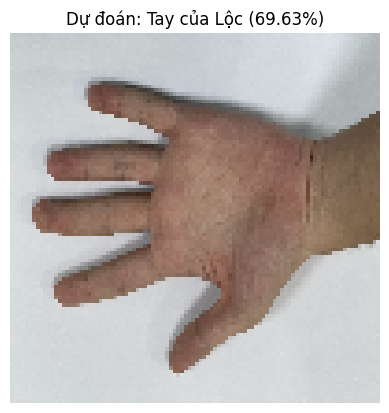

==> Mô hình đoán đây là: Tay của Lộc với độ tin cậy 69.63%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn ảnh đã upload
image_path = "/content/IMG_1845.JPG"

def predict_image(image_path, model, classes, img_size=(100, 100)):
    # Load và xử lý ảnh
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {classes[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    print(f"==> Mô hình đoán đây là: {classes[predicted_class]} với độ tin cậy {confidence:.2%}")

# Gọi hàm dự đoán
predict_image("/content/IMG_1845.JPG", model, classes)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import zipfile


zip_path = '/content/Faceshapee.zip'
extract_to = '/content/Faceshapee'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
print("✅ Đã giải nén xong")





img_size = (100, 100)
X = []
y = []

classes = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])
print("🧑‍🏫 Các lớp nhận diện:", classes)

for i, label in enumerate(classes):
    folder = os.path.join(data_path, label)
    img_count = 0
    for file in os.listdir(folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            try:
                img_path = os.path.join(folder, file)
                img = load_img(img_path, target_size=img_size)
                img = img_to_array(img) / 255.0
                X.append(img)
                y.append(i)
                img_count += 1
            except Exception as e:
                print("❌ Lỗi ảnh:", img_path, "->", e)
    print(f"📂 Lớp '{label}': {img_count} ảnh")


if len(X) == 0 or len(y) == 0:
    raise ValueError("❌ Không có ảnh nào được load. Kiểm tra lại cấu trúc thư mục!")

X = np.array(X)
y = np.array(y)
print(f"📷 Tổng số ảnh: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))


model = models.Sequential([
    layers.Flatten(input_shape=(100, 100, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

✅ Đã giải nén xong
🧑‍🏫 Các lớp nhận diện: ['FaceShape Dataset', 'Heart', 'Oblong', 'Oval', 'Round', 'Square']
📂 Lớp 'FaceShape Dataset': 0 ảnh
📂 Lớp 'Heart': 9 ảnh
📂 Lớp 'Oblong': 0 ảnh
📂 Lớp 'Oval': 0 ảnh
📂 Lớp 'Round': 0 ảnh
📂 Lớp 'Square': 0 ảnh
📷 Tổng số ảnh: 9


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,493,382 (59.10 MB)

 Trainable params: 15,493,382 (59.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 1.7646 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


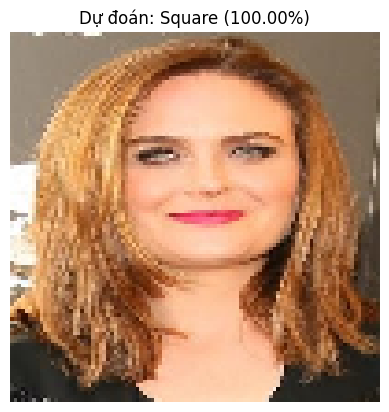

==> Mô hình đoán đây là: Square với độ tin cậy 100.00%


In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn ảnh đã upload
image_path = "/content/square (1).jpg"

def predict_image(image_path, model, classes, img_size=(100, 100)):
    # Load và xử lý ảnh
    img = load_img(image_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    # Hiển thị kết quả
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {classes[predicted_class]} ({confidence*100:.2f}%)")
    plt.show()

    print(f"==> Mô hình đoán đây là: {classes[predicted_class]} với độ tin cậy {confidence:.2%}")

# Gọi hàm dự đoán
predict_image("/content/square (1).jpg", model, classes)